In [2]:
from google.colab import files
uploaded=files.upload()

Saving Afficionado Coffee Roasters.xlsx - Transactions.csv to Afficionado Coffee Roasters.xlsx - Transactions (1).csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Afficionado Coffee Roasters.xlsx - Transactions.csv')

In [5]:
df.head()

,transaction_id,year,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2025,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2025,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2025,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2025,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2025,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   year              149116 non-null  int64  
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 12.5+ MB


In [7]:
df.describe()

,transaction_id,year,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.0,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2025.0,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.0,0.542509,2.074241,17.930020,2.658723
min,1.000000,2025.0,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2025.0,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2025.0,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2025.0,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2025.0,8.000000,8.000000,87.000000,45.000000


In [8]:
df.isnull().sum()

,0
transaction_id,0
year,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [9]:
df=df.dropna()

In [10]:
df=df.drop_duplicates()

In [11]:
df=df[(df["transaction_qty"]>0)&(df["unit_price"]>0)]

In [12]:
df["transaction_time"]=pd.to_datetime(df["transaction_time"])

/tmp/ipython-input-1667929710.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["transaction_time"]=pd.to_datetime(df["transaction_time"])


In [13]:
df["revenue"]=df["transaction_qty"]*df["unit_price"]

In [14]:
df

,transaction_id,year,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue
0,1,2025,2026-02-17 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00
1,2,2025,2026-02-17 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20
2,3,2025,2026-02-17 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00
3,4,2025,2026-02-17 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00
4,5,2025,2026-02-17 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2025,2026-02-17 20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00
149112,149453,2025,2026-02-17 20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00
149113,149454,2025,2026-02-17 20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00
149114,149455,2025,2026-02-17 20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75


In [17]:
df["hour"]=df["transaction_time"].dt.hour
df["day_of_week"]=df["transaction_time"].dt.day_name()
df["date"]=df["transaction_time"].dt.date

In [18]:
df

,transaction_id,year,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue,hour,day_of_week,date
0,1,2025,2026-02-17 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,7,Tuesday,2026-02-17
1,2,2025,2026-02-17 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,7,Tuesday,2026-02-17
2,3,2025,2026-02-17 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,7,Tuesday,2026-02-17
3,4,2025,2026-02-17 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,7,Tuesday,2026-02-17
4,5,2025,2026-02-17 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,7,Tuesday,2026-02-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2025,2026-02-17 20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,20,Tuesday,2026-02-17
149112,149453,2025,2026-02-17 20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,20,Tuesday,2026-02-17
149113,149454,2025,2026-02-17 20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,20,Tuesday,2026-02-17
149114,149455,2025,2026-02-17 20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,20,Tuesday,2026-02-17


In [19]:
def time_bucket(hour):
  if 6<=hour<=11:
    return"Morning"
  elif 12<=hour<=16:
    return"Afernoon"
  elif 17<=hour<=21:
    return "Evening"
  else:
    return"late night"
df["time_bucket"]=df["hour"].apply(time_bucket)

In [20]:
df

,transaction_id,year,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue,hour,day_of_week,date,time_bucket
0,1,2025,2026-02-17 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,7,Tuesday,2026-02-17,Morning
1,2,2025,2026-02-17 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,7,Tuesday,2026-02-17,Morning
2,3,2025,2026-02-17 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,7,Tuesday,2026-02-17,Morning
3,4,2025,2026-02-17 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,7,Tuesday,2026-02-17,Morning
4,5,2025,2026-02-17 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,7,Tuesday,2026-02-17,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2025,2026-02-17 20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,20,Tuesday,2026-02-17,Evening
149112,149453,2025,2026-02-17 20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,20,Tuesday,2026-02-17,Evening
149113,149454,2025,2026-02-17 20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,20,Tuesday,2026-02-17,Evening
149114,149455,2025,2026-02-17 20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,20,Tuesday,2026-02-17,Evening


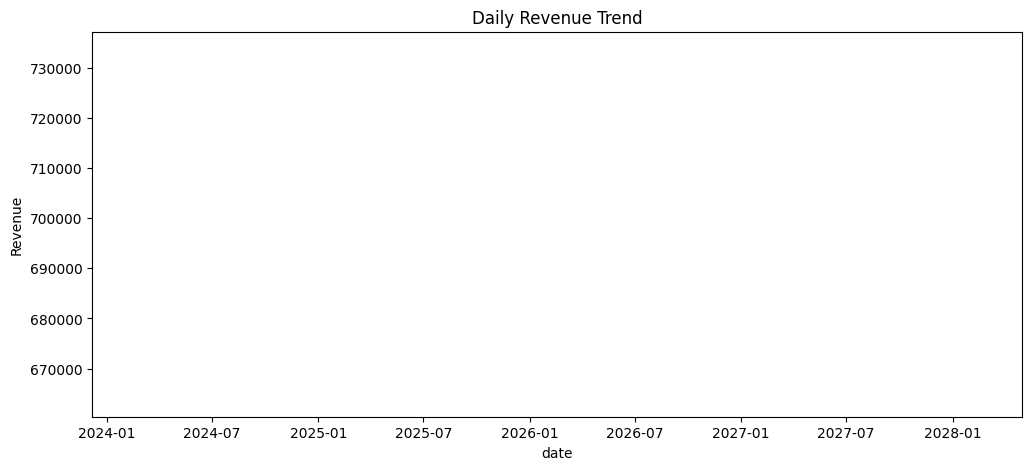

In [21]:
daily_sales=df.groupby("date")["revenue"].sum()
plt.figure(figsize=(12,5))
daily_sales.plot()
plt.title("Daily Revenue Trend")
plt.xlabel("date")
plt.ylabel("Revenue")
plt.show()

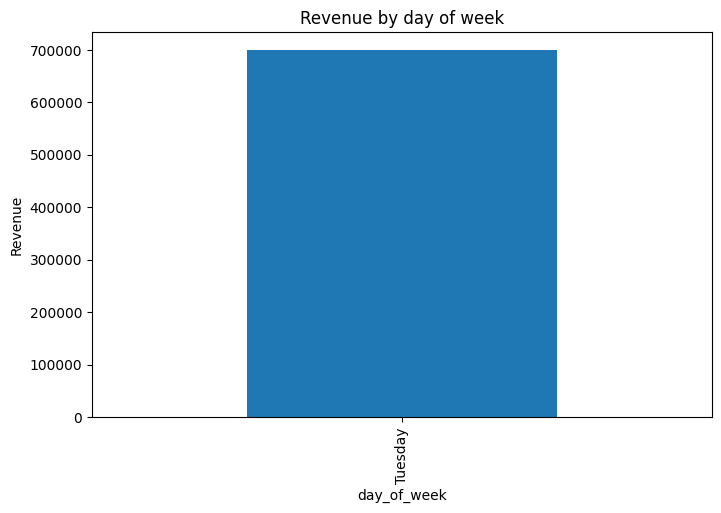

In [22]:
weekday_sales=df.groupby("day_of_week")["revenue"].sum()
plt.figure(figsize=(8,5))
weekday_sales.plot(kind="bar")
plt.title("Revenue by day of week")
plt.ylabel("Revenue")
plt.show()

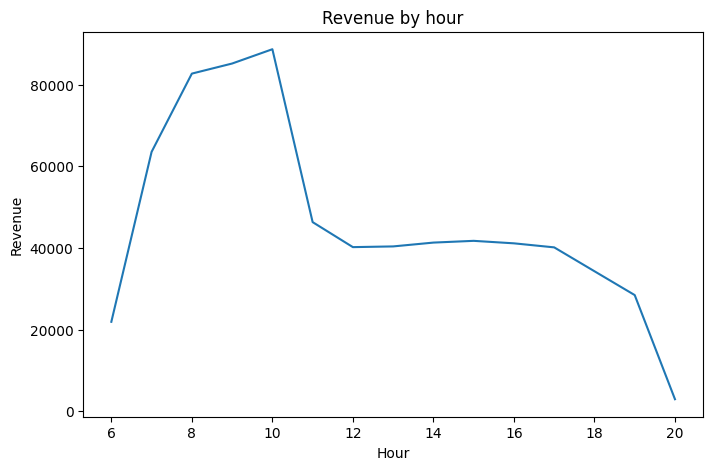

In [23]:
hourly_sales=df.groupby("hour")["revenue"].sum()
plt.figure(figsize=(8,5))
hourly_sales.plot()
plt.title("Revenue by hour")
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.show()

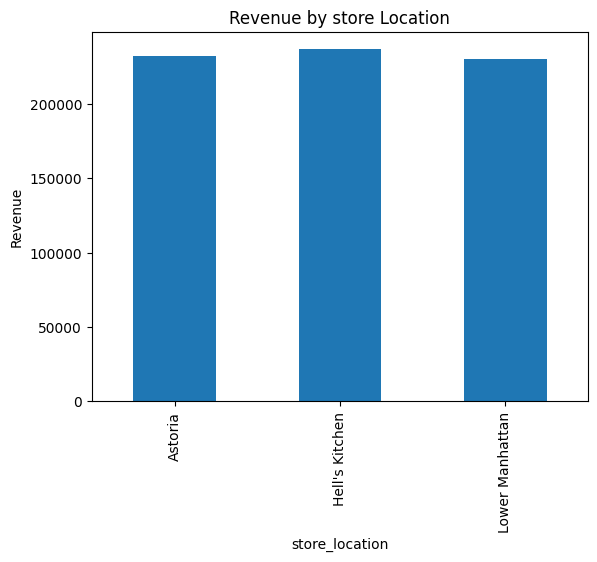

In [24]:
store_sales=df.groupby("store_location")["revenue"].sum()
store_sales.plot(kind="bar")
plt.title("Revenue by store Location")
plt.ylabel("Revenue")
plt.show()

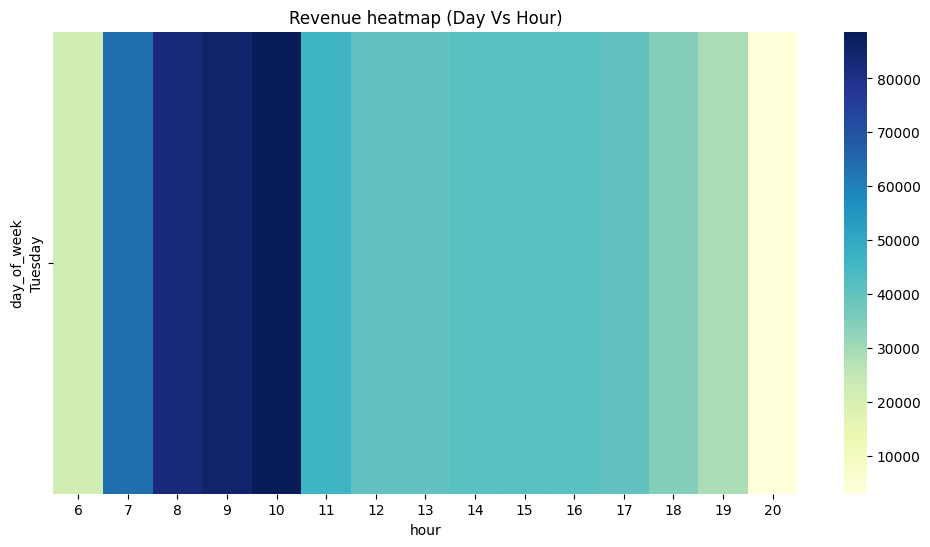

In [26]:
pivot=df.pivot_table(values="revenue",
                     index="day_of_week",
                     columns="hour",
                     aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(pivot,cmap="YlGnBu")
plt.title("Revenue heatmap (Day Vs Hour)")
plt.show()

In [27]:
print("total Revenue:",df["revenue"].sum())

total Revenue: 698812.3300000002


In [28]:
print("Total transactions:",df["transaction_id"].nunique())

Total transactions: 149116


In [30]:
avg_order=df["revenue"].sum()
df["transaction_id"].nunique()
print("average order Value:",avg_order)

average order Value: 698812.3300000002


In [31]:
df.to_csv("cleaned_coffee_sales.csv",index=False)
files.download("cleaned_coffee_sales.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>